In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from timeit import default_timer as timer
%matplotlib inline

In [2]:
output_folder = "Finding"
real_crop_size_folder = os.path.join(output_folder, "real_crop")
doggo_color_img = cv2.imread(os.path.join(output_folder, "doggo1.png"))
doggo_gray_img =  cv2.cvtColor(doggo_color_img, cv2.COLOR_BGR2GRAY)
kids_color_img = cv2.imread(os.path.join(output_folder, "kids.png"))
kids_gray_img = cv2.cvtColor(kids_color_img, cv2.COLOR_BGR2GRAY)

In [3]:
def show_finding_imgs(color_img, gray_img):
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.imshow(color_img[:,:,::-1])
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(gray_img)
    plt.axis("off")

ẢNH TÌM KIẾM ĐỒ VẬT

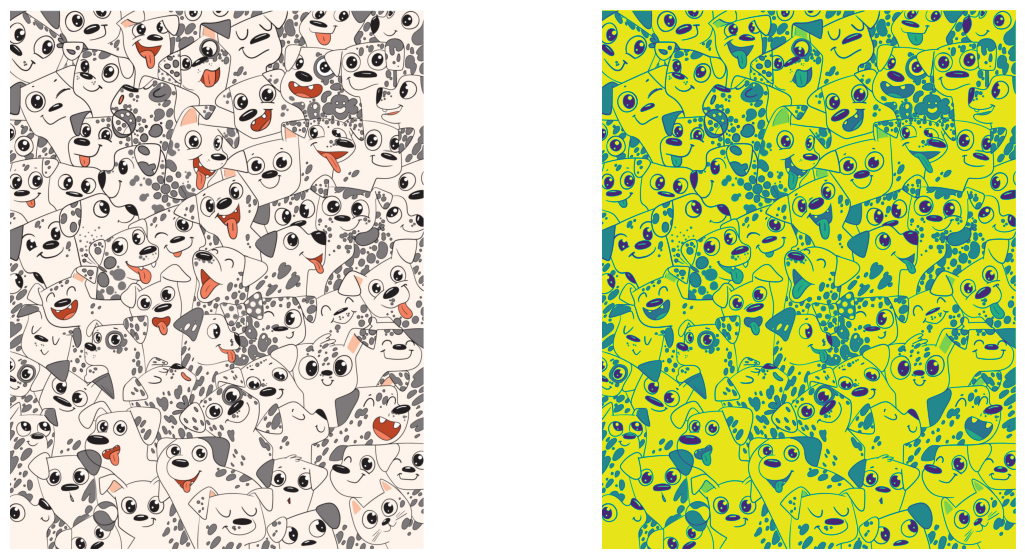

In [4]:
show_finding_imgs(doggo_color_img, doggo_gray_img)

HÀM TẠO LIST CHỨA CÁC LINK TEMPLATE

In [5]:
def make_template_link(folder_link, name, number_of_images):
    templates_link = []
    for i in range(number_of_images):
        templates_link.append(os.path.join(folder_link, f"{name}{i+1}.png"))
    print(templates_link)
    return templates_link

In [6]:
doggo_template_links = make_template_link(real_crop_size_folder, "dog", 12)

['Finding\\real_crop\\dog1.png', 'Finding\\real_crop\\dog2.png', 'Finding\\real_crop\\dog3.png', 'Finding\\real_crop\\dog4.png', 'Finding\\real_crop\\dog5.png', 'Finding\\real_crop\\dog6.png', 'Finding\\real_crop\\dog7.png', 'Finding\\real_crop\\dog8.png', 'Finding\\real_crop\\dog9.png', 'Finding\\real_crop\\dog10.png', 'Finding\\real_crop\\dog11.png', 'Finding\\real_crop\\dog12.png']


HÀM PHÁT HIỆN EDGE

In [7]:
def canny_threshOtsu(gray_img):
    otsu_threshold, _ = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU)
    low_thresh = 0.5 * otsu_threshold
    high_thresh = 1.5 * otsu_threshold
    return cv2.Canny(gray_img, low_thresh, high_thresh)

HÀM HIỂN THỊ TEMPLATES

In [8]:
def show_templates(templates_link, color, axis = False, canny = False):
    fig, axes = plt.subplots(3,4)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    for i, ax in enumerate(axes.flatten()):
        template = cv2.imread(templates_link[i])
        template = cv2.cvtColor(template, color)
        if canny:
            template = canny_threshOtsu(template)
        ax.imshow(template)
        if axis:
            ax.axis("off")

TEMPLATES ĐƯỢC CẮT RA TỪ ẢNH GỐC, CHƯA QUA XỬ LÝ

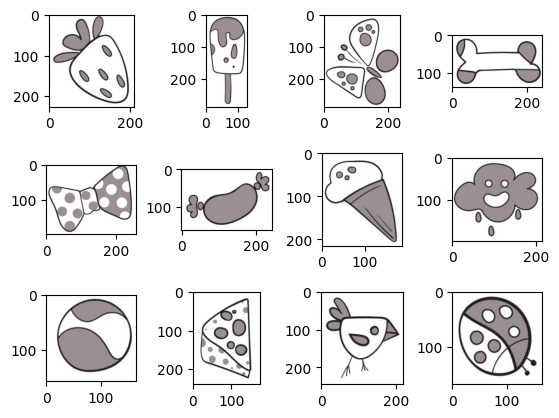

In [9]:
show_templates(doggo_template_links, cv2.COLOR_BGR2RGB)

HÀM TÔ ĐEN BACKGROUND TEMPLATES

In [10]:
def black_background(templates_link, name):
    for i,link in enumerate(templates_link):
        img = cv2.imread(link)
        filled_color_img = img.copy()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        h, w = gray.shape[:2]
        _, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
        mask = cv2.bitwise_not(mask)
        mask_expanded_original = np.zeros((h+2, w+2), np.uint8)
        mask_expanded_original[1:-1, 1:-1] = mask

        
        b, g, r = cv2.split(img)
        # Tạo bản sao để không thay đổi ảnh gốc
        mask_expanded = mask_expanded_original.copy()
        cv2.floodFill(b, mask_expanded, (0, 0), 0, loDiff=20, upDiff=20)
        mask_expanded = mask_expanded_original.copy()  # Reset lại mask
        cv2.floodFill(g, mask_expanded, (0, 0), 0, loDiff=20, upDiff=20)
        mask_expanded = mask_expanded_original.copy()  # Reset lại mask
        cv2.floodFill(r, mask_expanded, (0, 0), 0, loDiff=20, upDiff=20)

        # Gộp lại thành ảnh màu sau khi xử lý
        filled_color_img = cv2.merge((b, g, r))
        # opening morph để loại bỏ các điểm trắng ở biên ảnh do hàm fill không tô đen hết background
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        filled_color_img = cv2.morphologyEx(filled_color_img, cv2.MORPH_OPEN, kernel)
        cv2.imwrite(os.path.join(real_crop_size_folder, f"bbg_{name}{i+1}.png"), filled_color_img)
    
    

In [11]:
black_background(doggo_template_links, "dog")

In [12]:
bbg_doggo_template_links = make_template_link(real_crop_size_folder, "bbg_dog", 12)

['Finding\\real_crop\\bbg_dog1.png', 'Finding\\real_crop\\bbg_dog2.png', 'Finding\\real_crop\\bbg_dog3.png', 'Finding\\real_crop\\bbg_dog4.png', 'Finding\\real_crop\\bbg_dog5.png', 'Finding\\real_crop\\bbg_dog6.png', 'Finding\\real_crop\\bbg_dog7.png', 'Finding\\real_crop\\bbg_dog8.png', 'Finding\\real_crop\\bbg_dog9.png', 'Finding\\real_crop\\bbg_dog10.png', 'Finding\\real_crop\\bbg_dog11.png', 'Finding\\real_crop\\bbg_dog12.png']


ẢNH TEMPLATE RGB BACKGROUND ĐEN

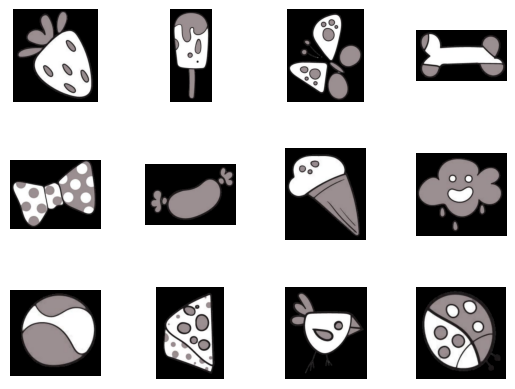

In [13]:
show_templates(bbg_doggo_template_links, cv2.COLOR_BGR2RGB, True)

ẢNH TEMPLATE GRAY BACKGROUND ĐEN

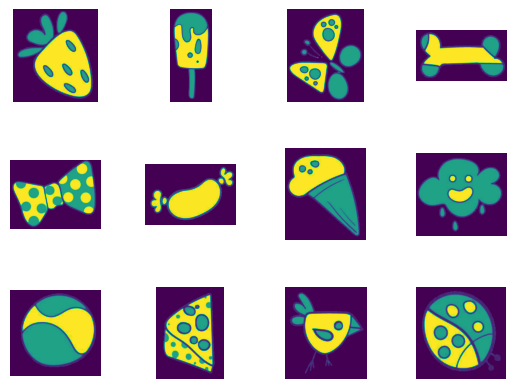

In [14]:
show_templates(bbg_doggo_template_links, cv2.COLOR_BGR2GRAY, True)

ẢNH TEMPLATE GRAY BACKGROUND ĐEN, ĐÃ QUA XỬ LÝ PHÁT HIỆN CẠNH

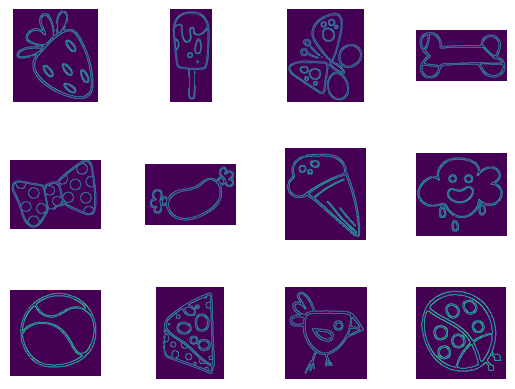

In [15]:
show_templates(bbg_doggo_template_links, cv2.COLOR_BGR2GRAY, True, True)

ẢNH TÌM KIẾM GRAY, ĐÃ QUA XỬ LÝ PHÁT HIỆN CẠNH

(np.float64(-0.5), np.float64(1788.5), np.float64(2330.5), np.float64(-0.5))

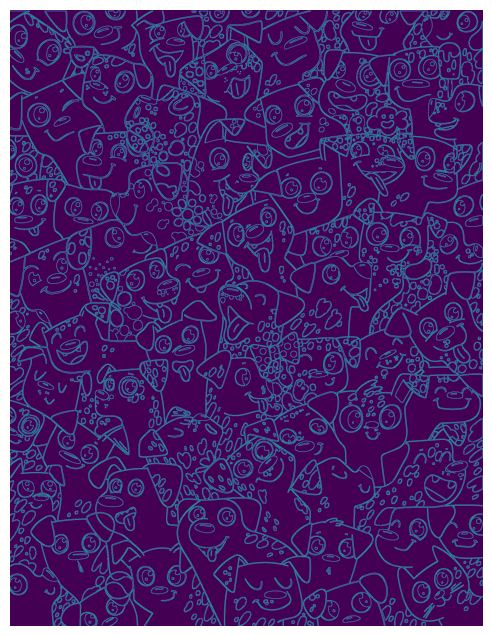

In [16]:
doggo_gray_edge_img = canny_threshOtsu(doggo_gray_img)
plt.figure(figsize=(16,8))
plt.imshow(doggo_gray_edge_img)
plt.axis("off")

In [17]:
def print_array(arr):
    for row in arr:
        for col in row:
            print(col, end=" ")
        print()

TÌM KIẾM ĐỒ VẬT BẰNG MULTI SCALE TEMPLATE MATCHING

In [18]:
def multi_scale_template_matching(templates_links, meth, img, scales):
    start = timer()
    method = getattr(cv2, meth)
    img = canny_threshOtsu(img)
    
    if method not in [cv2.TM_CCOEFF_NORMED, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR_NORMED]:
        raise ValueError(f"Invalid method: {method}. Must be one of [cv2.TM_CCOEFF_NORMED, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR_NORMED].")

    if method == cv2.TM_SQDIFF_NORMED:
        best_find = {i: [float('inf')] for i in range(len(templates_links))}
    else:
        best_find = {i: [-float('inf')] for i in range(len(templates_links))}
        
    for scale in scales:
        for i in range(len(templates_links)):
            template = cv2.imread(templates_links[i])
            if template is None:
                print(f"Error: Cannot load template {templates_links[i]}")
                continue
            # tạo mask
            template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
            _, mask = cv2.threshold(template, 5, 255, cv2.THRESH_BINARY)
            
            # edge canny
            template = canny_threshOtsu(template)
                
            h, w = template.shape[:2]
            new_h, new_w = int(h * scale), int(w * scale)

            if new_h < 1 or new_w < 1:
                continue  

            template_resized = cv2.resize(template, (new_w, new_h), interpolation=cv2.INTER_NEAREST)
            mask_resized = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_NEAREST)
            
            if method == cv2.TM_SQDIFF_NORMED:
                res = cv2.matchTemplate(img, template_resized, method, mask=mask_resized)
                min_val, _, min_loc, _ = cv2.minMaxLoc(res)
                # Cập nhật kết quả tốt nhất nếu tìm thấy giá trị SSD thấp hơn
                if min_val < best_find[i][0]:
                    best_find[i] = [min_val, min_loc, new_w, new_h, scale]
            else:
                res = cv2.matchTemplate(img, template_resized, method)
                _, max_val, _, max_loc = cv2.minMaxLoc(res)
                # Cập nhật kết quả tốt nhất nếu tìm thấy giá trị SSD thấp hơn
                if max_val > best_find[i][0]:
                    best_find[i] = [max_val, max_loc, new_w, new_h, scale]
            
    end = timer()
    return best_find, end - start


def draw_findings(best_find, img, method, run_time):
    for i in best_find:
        if len(best_find[i]) < 2:
            continue
        _, top_left, new_w, new_h, _ = best_find[i]
        bottom_right = (top_left[0] + new_w, top_left[1] + new_h)
        cv2.rectangle(img, top_left, bottom_right, (0, 0, 0), 7)

    plt.figure(figsize=(16,8))
    plt.title(f"FOUND ITEMS with method {method}, run time {run_time:.4f}")
    plt.imshow(img[:,:,::-1])
    plt.axis("off")
    plt.show()


In [19]:
scales = np.arange(1.0, 0.45, -0.05)

In [20]:
methods = ['TM_SQDIFF_NORMED', 'TM_CCOEFF_NORMED', 'TM_CCORR_NORMED']

In [21]:
for meth in methods:
    best_find_dogs, run_time = multi_scale_template_matching(bbg_doggo_template_links, meth = meth, img = doggo_gray_img, scales = scales)
    draw_findings(best_find_dogs, doggo_color_img.copy(), meth, run_time)

In [22]:
for i,value in enumerate(best_find_dogs.values()):
    print(f"Item {i+1} found with scale {value[4]:.4f}")

Item 1 found with scale 0.8000
Item 2 found with scale 0.8000
Item 3 found with scale 0.8000
Item 4 found with scale 0.6500
Item 5 found with scale 0.8000
Item 6 found with scale 0.7500
Item 7 found with scale 0.7500
Item 8 found with scale 0.8000
Item 9 found with scale 0.8000
Item 10 found with scale 0.8000
Item 11 found with scale 0.7000
Item 12 found with scale 0.8000


EXTRA: TÌM KIẾM ĐỒ VẬT TRÊN ẢNH KINDERGARTEN

In [23]:
kids_template_links = make_template_link(real_crop_size_folder, "kid", 15)

['Finding\\real_crop\\kid1.png', 'Finding\\real_crop\\kid2.png', 'Finding\\real_crop\\kid3.png', 'Finding\\real_crop\\kid4.png', 'Finding\\real_crop\\kid5.png', 'Finding\\real_crop\\kid6.png', 'Finding\\real_crop\\kid7.png', 'Finding\\real_crop\\kid8.png', 'Finding\\real_crop\\kid9.png', 'Finding\\real_crop\\kid10.png', 'Finding\\real_crop\\kid11.png', 'Finding\\real_crop\\kid12.png', 'Finding\\real_crop\\kid13.png', 'Finding\\real_crop\\kid14.png', 'Finding\\real_crop\\kid15.png']


In [24]:
black_background(kids_template_links, "kid")

In [25]:
bbg_kids_template_links = make_template_link(real_crop_size_folder, "bbg_kid", 15)

['Finding\\real_crop\\bbg_kid1.png', 'Finding\\real_crop\\bbg_kid2.png', 'Finding\\real_crop\\bbg_kid3.png', 'Finding\\real_crop\\bbg_kid4.png', 'Finding\\real_crop\\bbg_kid5.png', 'Finding\\real_crop\\bbg_kid6.png', 'Finding\\real_crop\\bbg_kid7.png', 'Finding\\real_crop\\bbg_kid8.png', 'Finding\\real_crop\\bbg_kid9.png', 'Finding\\real_crop\\bbg_kid10.png', 'Finding\\real_crop\\bbg_kid11.png', 'Finding\\real_crop\\bbg_kid12.png', 'Finding\\real_crop\\bbg_kid13.png', 'Finding\\real_crop\\bbg_kid14.png', 'Finding\\real_crop\\bbg_kid15.png']


In [26]:
kids_scales = np.arange(1.0, 0.4, -0.05)
print(len(kids_scales))

12


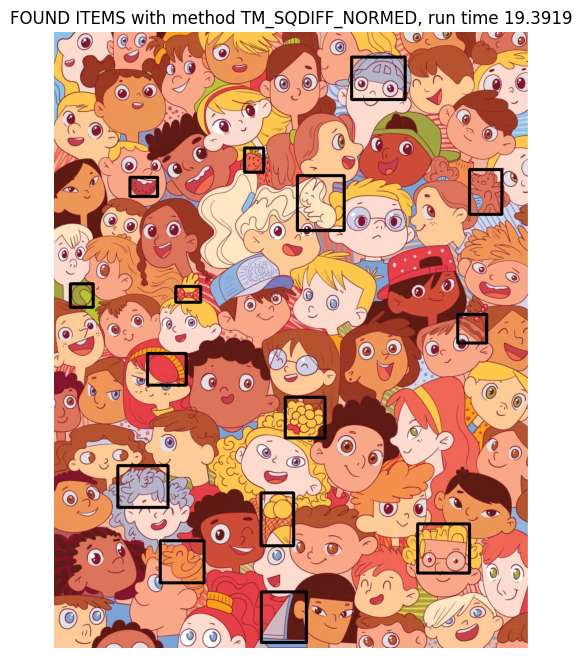

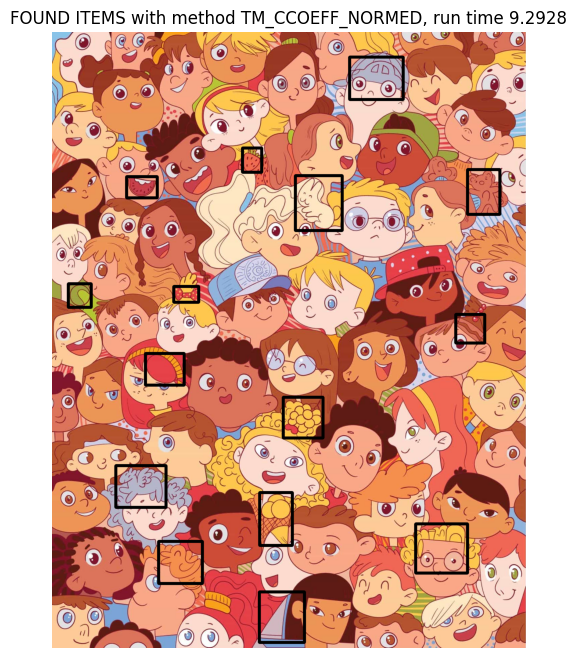

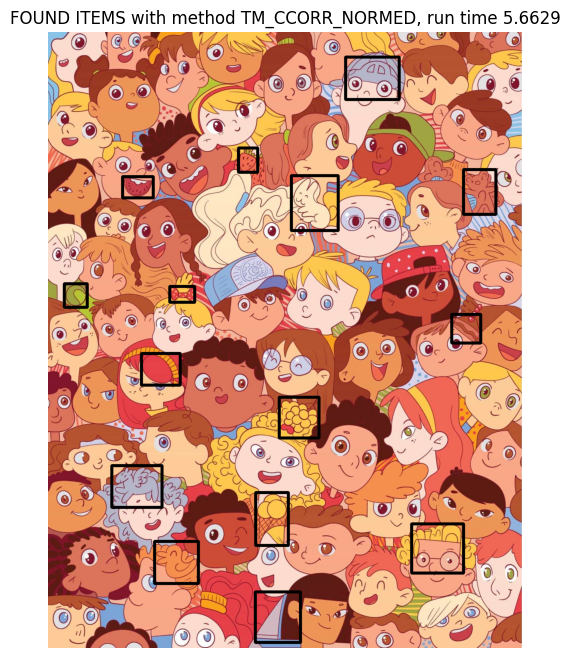

In [27]:
for meth in methods:
    best_find_kids, run_time = multi_scale_template_matching(bbg_kids_template_links, meth = meth, img = kids_gray_img, scales = kids_scales)
    draw_findings(best_find_kids, kids_color_img.copy(), meth, run_time)

In [28]:
for i,value in enumerate(best_find_kids.values()):
    print(f"Item {i+1} found with scale {value[4]:.4f}")

Item 1 found with scale 0.7000
Item 2 found with scale 0.6000
Item 3 found with scale 0.7000
Item 4 found with scale 0.6000
Item 5 found with scale 0.6000
Item 6 found with scale 0.5000
Item 7 found with scale 0.7000
Item 8 found with scale 0.7000
Item 9 found with scale 0.4500
Item 10 found with scale 0.6000
Item 11 found with scale 0.6000
Item 12 found with scale 0.6000
Item 13 found with scale 0.5500
Item 14 found with scale 0.7000
Item 15 found with scale 0.7000
